In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import PIL
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from model.data_loader import *

In [3]:
train_pth = 'data/facades_processed/train'
checkpoints_pth = f'results/facades/checkpoints/images'
val_pth   = 'data/facades_processed/val'

## Data augmentation

Zoom and horizontal flip

In [45]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=[0.8, 1.0],
    horizontal_flip=True,
    fill_mode='constant',
    data_format='channels_last',
    validation_split=0.0
)

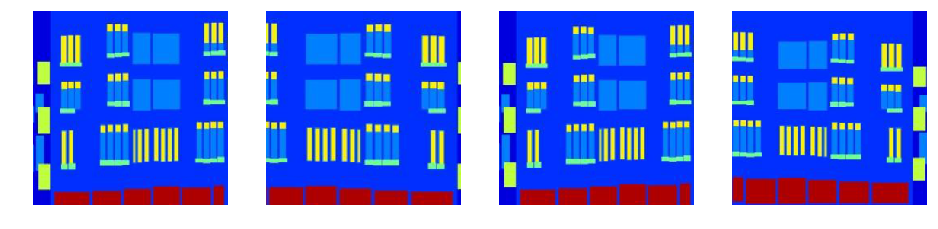

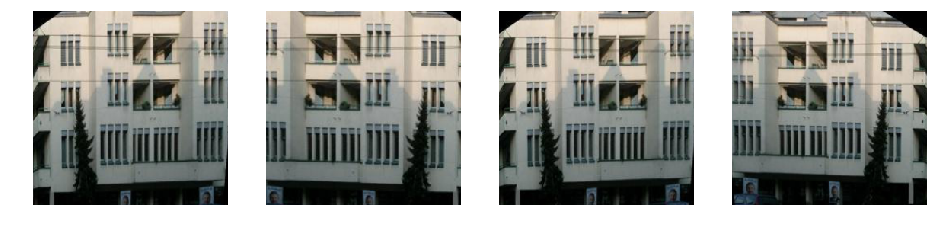

In [47]:
show_augmentation(f'{train_pth}/input/1.jpg', train_generator, n_rows=1)
show_augmentation(f'{train_pth}/target/1.jpg', train_generator, n_rows=1)

In [11]:
train_loader = dataLoader(train_pth, train_generator, batch_sz=1, shuffle=True, img_sz=(256, 256))

Found 400 images belonging to 1 classes.
Found 400 images belonging to 1 classes.


In [23]:
input_, target = next(train_loader)

## Checkpoints loader

In [4]:
check_generator = ImageDataGenerator(
    rescale=1./255,
    fill_mode='constant',
    data_format='channels_last',
    validation_split=0.0
)

check_loader = dataLoader(checkpoints_pth, check_generator, batch_sz=1, shuffle=False, img_sz=(256, 256))

In [16]:
input_, target = next(check_loader)

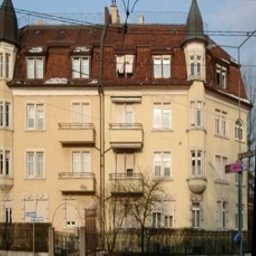

In [76]:
arr = np.asarray(denormalize(target[0])*255, dtype='uint8')
PIL.Image.fromarray(arr)